# Assessing and Identifying a Suitable Teacher Model

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Set-Up-and-Imports" data-toc-modified-id="Set-Up-and-Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Set-Up and Imports</a></span><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Log-Files" data-toc-modified-id="Log-Files-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Log Files</a></span></li></ul></li><li><span><a href="#Data-Retrieval-and-Cleaning" data-toc-modified-id="Data-Retrieval-and-Cleaning-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Retrieval and Cleaning</a></span><ul class="toc-item"><li><span><a href="#Acquisition-of-Data" data-toc-modified-id="Acquisition-of-Data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Acquisition of Data</a></span></li><li><span><a href="#Segment-Logs" data-toc-modified-id="Segment-Logs-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Segment Logs</a></span></li></ul></li><li><span><a href="#Standard-Comparison-of-Models" data-toc-modified-id="Standard-Comparison-of-Models-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Standard Comparison of Models</a></span><ul class="toc-item"><li><span><a href="#General-Loss-Curves" data-toc-modified-id="General-Loss-Curves-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>General Loss Curves</a></span></li><li><span><a href="#Evaluation-Metric-Curves" data-toc-modified-id="Evaluation-Metric-Curves-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Evaluation Metric Curves</a></span></li><li><span><a href="#Training-Metrics" data-toc-modified-id="Training-Metrics-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Training Metrics</a></span></li><li><span><a href="#Evaluation-Metric-Summaries" data-toc-modified-id="Evaluation-Metric-Summaries-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Evaluation Metric Summaries</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

## Set-Up and Imports

### Imports

In [1]:
import np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from math import floor, ceil

### Log Files

In [2]:
# only works on Windows!
!tree ./logs

Folder PATH listing for volume Acer
Volume serial number is 06F4-9C1C
C:\USERS\PRANNAYA\NUSH\CS5131\PROJECT\RESEARCH\LOGS
+---bert-base-uncased-finetuned-sentence-classification
¦   +---save_metrics
¦       +---1648034827.6600163
¦       +---1648035498.9184391
+---distilbert-base-uncased-finetuned-sentence-classification
¦   +---save_metrics
¦       +---1648024208.5232677
+---distilgpt2-finetuned-sentence-classification
¦   +---save_metrics
¦       +---1648126069.261717
¦       +---1648126300.5147512
+---roberta-base-finetuned-sentence-classification
¦   +---save_metrics
¦       +---1648058086.7205102
+---roberta_noisy


In [3]:
for filename in glob("logs/*/log_history.txt"): print(filename)

logs\bert-base-uncased-finetuned-sentence-classification\log_history.txt
logs\distilbert-base-uncased-finetuned-sentence-classification\log_history.txt
logs\distilgpt2-finetuned-sentence-classification\log_history.txt
logs\roberta-base-finetuned-sentence-classification\log_history.txt


## Data Retrieval and Cleaning

### Acquisition of Data

In [4]:
logs = []
for filename in glob("logs/*/log_history.txt"):
    with open(filename) as logfile:
        log = list(map(eval, logfile.readlines()))
        logs.append(pd.DataFrame(log))
    
logs[0]

,loss,learning_rate,epoch,step,eval_loss,eval_accuracy,eval_precision,eval_recall,eval_f1,eval_kappa,eval_runtime,eval_samples_per_second,eval_steps_per_second,train_runtime,train_samples_per_second,train_steps_per_second,total_flos,train_loss
0,1.2823,1.992080e-05,0.02,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0188,1.984160e-05,0.04,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.9180,1.976240e-05,0.06,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.8996,1.968319e-05,0.08,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.8202,1.960399e-05,0.10,2500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,0.2110,1.995882e-07,4.95,125000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
254,0.2811,1.203865e-07,4.97,125500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
255,0.2579,4.118486e-08,4.99,126000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
256,NaN,NaN,5.00,126260,1.433945,0.782288,0.781535,0.782288,0.781397,0.70908,304.6149,94.785,23.699,NaN,NaN,NaN,NaN,NaN


In [5]:
logs[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   loss                      252 non-null    float64
 1   learning_rate             252 non-null    float64
 2   epoch                     258 non-null    float64
 3   step                      258 non-null    int64  
 4   eval_loss                 5 non-null      float64
 5   eval_accuracy             5 non-null      float64
 6   eval_precision            5 non-null      float64
 7   eval_recall               5 non-null      float64
 8   eval_f1                   5 non-null      float64
 9   eval_kappa                5 non-null      float64
 10  eval_runtime              5 non-null      float64
 11  eval_samples_per_second   5 non-null      float64
 12  eval_steps_per_second     5 non-null      float64
 13  train_runtime             1 non-null      float64
 14  train_samp

### Segment Logs

In [6]:
def plot(model, modelName):
    modelLoss = model[~model.loss.isna()].reset_index()[["loss", "learning_rate", "epoch", "step"]]
    modelTrain = model[model.loss.isna()].iloc[-1].dropna().drop(("epoch")).drop("step").to_dict()
    modelEval = model[model.loss.isna()].iloc[:-1].reset_index().drop(columns=["index", "loss", "learning_rate", "step", "train_runtime", "train_samples_per_second", "train_steps_per_second", "total_flos", "train_loss"])
    modelEval.epoch = modelEval.epoch.astype(int)
    modelEval = modelEval.set_index("epoch")
    ax = modelLoss.plot(y="loss", x="epoch", figsize=(16, 8), ylabel="Loss", xlabel="Epoch", title=f"Loss Curve of {modelName} Teacher Model", legend=False, xlim=(0,5))
    colors = ["#ACDDDE", "#CAF1DE", "#E1F8DC", "#FEF8DD", "#FFE7C7", "#F7D8BA", "#D6CDEA"]
    #colors = ["#003049", "#D62828", "#FF7F00", "#FCBF49", "#EAE2B7"]
    #colors = ["#581845", "#900C3F", "#C70039", "#FF5733", "#FFC300"]
    for epoch, color in zip(range(5), colors):
        ax.axvspan(epoch, epoch+1, alpha=0.5, color=color)
    return modelLoss, modelTrain, modelEval

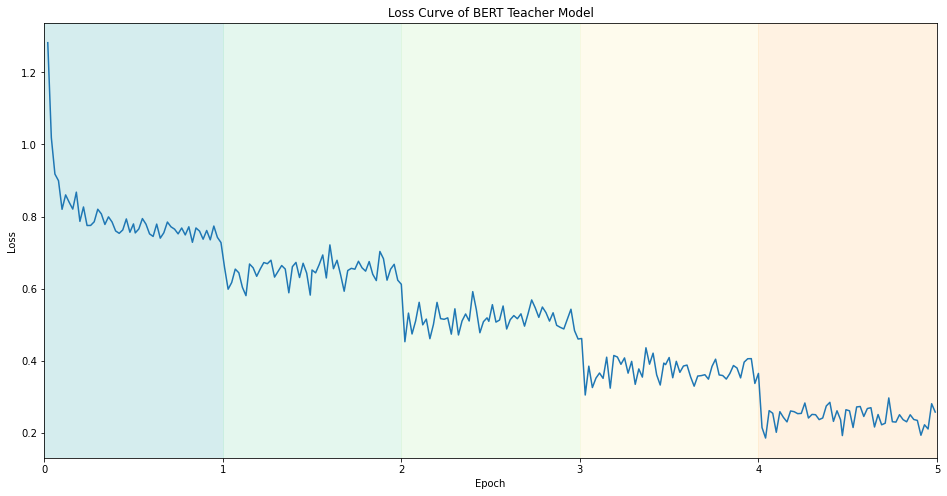

In [7]:
bertLoss, bertTrain, bertEval = plot(logs[0], "BERT")

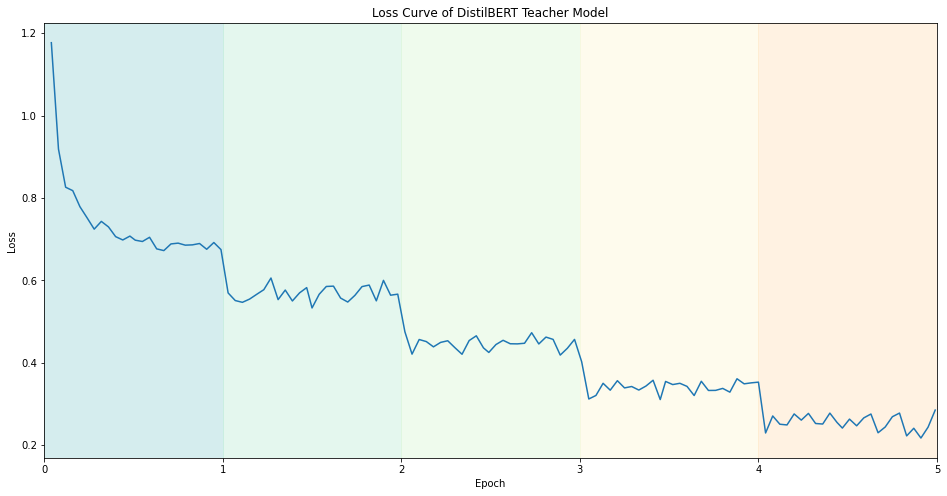

In [8]:
dbertLoss, dbertTrain, dbertEval = plot(logs[1], "DistilBERT")

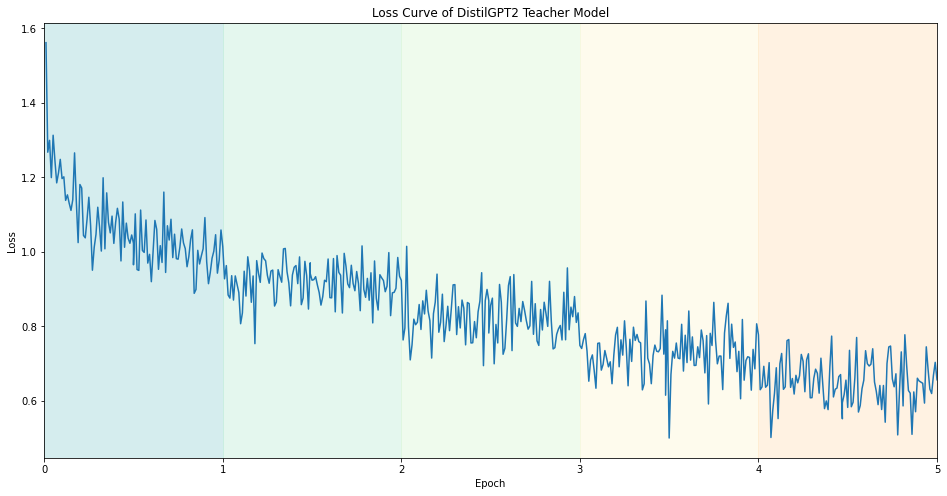

In [9]:
gptLoss, gptTrain, gptEval = plot(logs[2], "DistilGPT2")

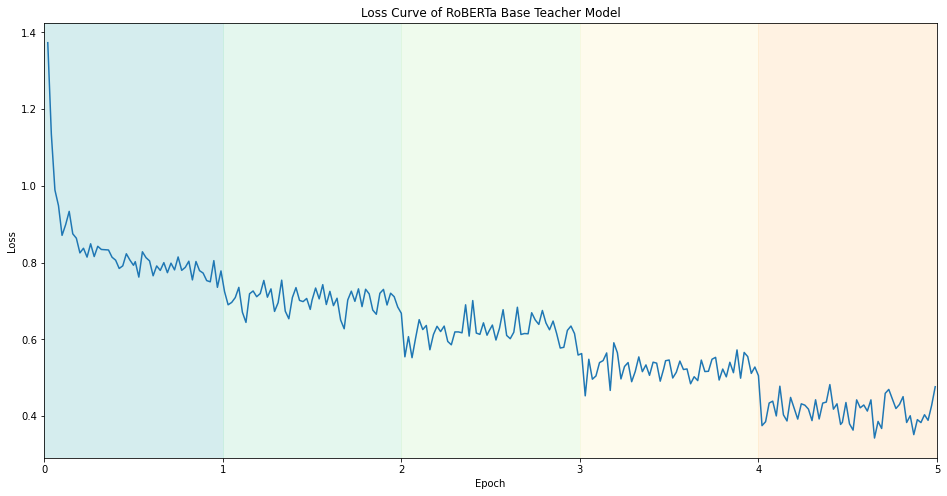

In [10]:
robertaLoss, robertaTrain, robertaEval = plot(logs[3], "RoBERTa Base")

## Standard Comparison of Models

### General Loss Curves

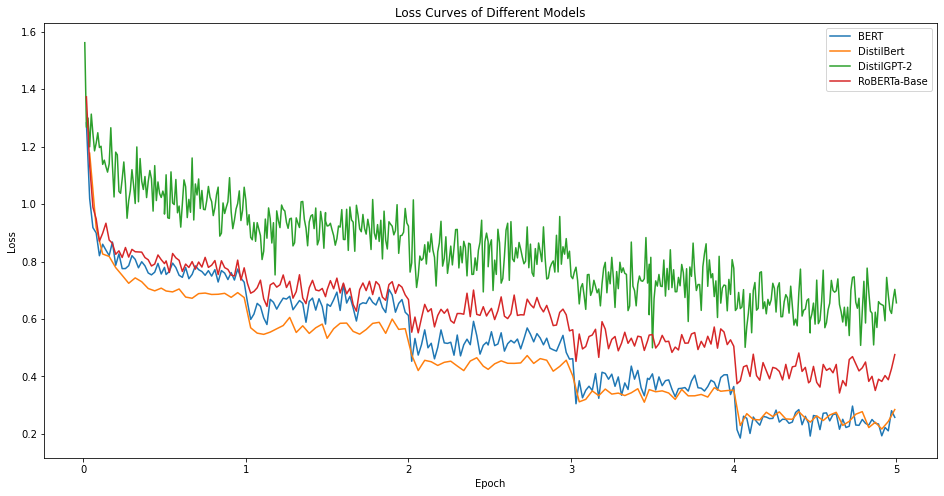

In [11]:
fig, ax = plt.subplots(figsize=(16, 8))
bertLoss.plot(y="loss", x="epoch", label=f"BERT", ax=ax)
dbertLoss.plot(y="loss", x="epoch", label=f"DistilBert", ax=ax)
gptLoss.plot(y="loss", x="epoch", label=f"DistilGPT-2", ax=ax)
robertaLoss.plot(y="loss", x="epoch", label=f"RoBERTa-Base", ax=ax)
_ = ax.set(ylabel="Loss", xlabel="Epoch", title="Loss Curves of Different Models") 

### Evaluation Metric Curves

In [12]:
def evalCurves(col, label=None, score=False):
    if label is None: label = col.title()
    if score: label += " Score"
    fig, ax = plt.subplots(figsize=(16, 8))
    bertEval.plot(y="eval_"+col, label=f"BERT", ax=ax)
    dbertEval.plot(y="eval_"+col, label=f"DistilBert", ax=ax)
    gptEval.plot(y="eval_"+col, label=f"DistilGPT-2", ax=ax)
    robertaEval.plot(y="eval_"+col, label=f"RoBERTa-Base", ax=ax)
    _ = ax.set(ylabel="Evaluation "+label, xlabel="Epoch", title="Evaluation "+label+" (per Epoch) of Different Models")

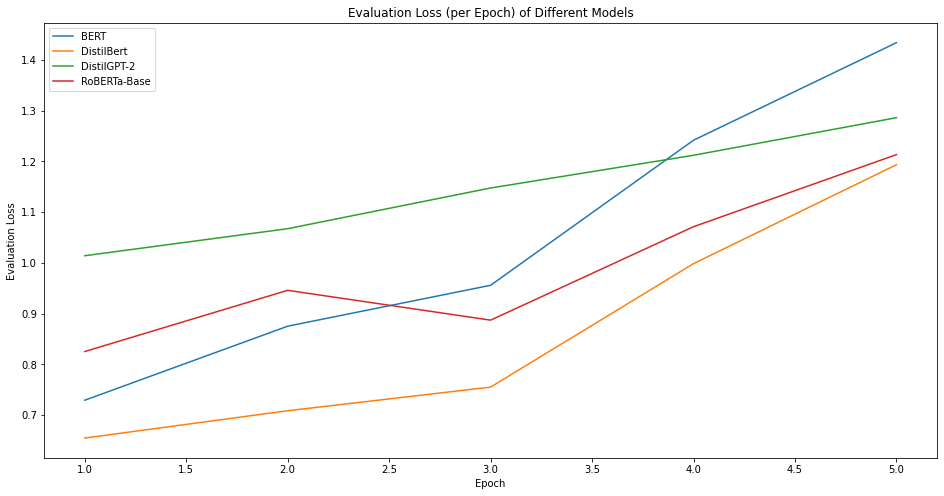

In [13]:
evalCurves("loss")

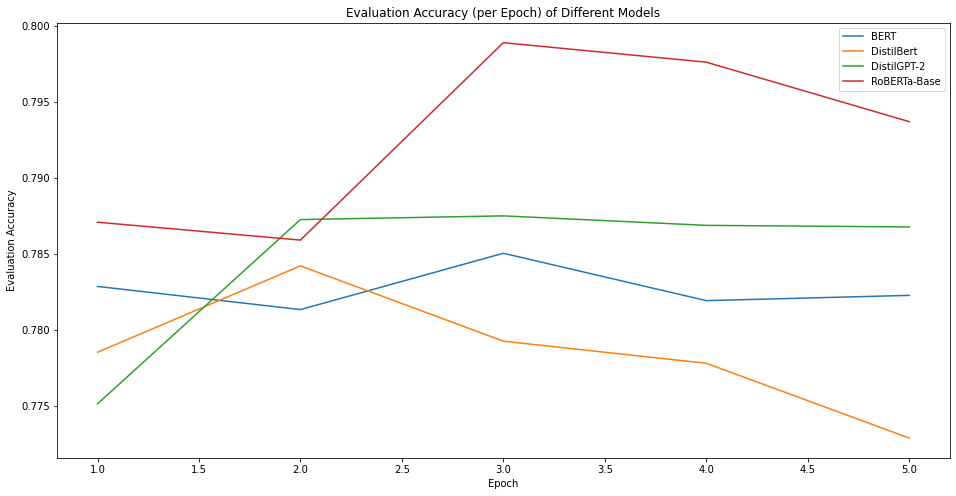

In [14]:
evalCurves("accuracy")

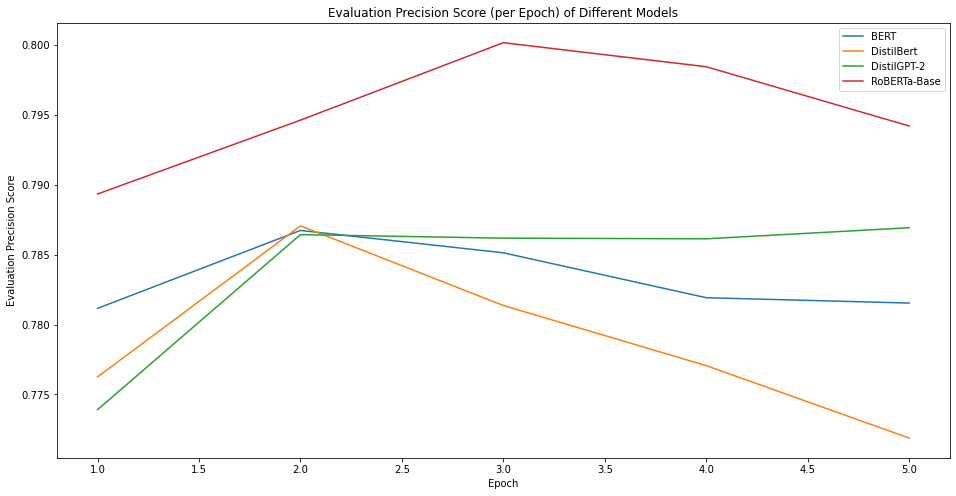

In [15]:
evalCurves("precision", score=True)

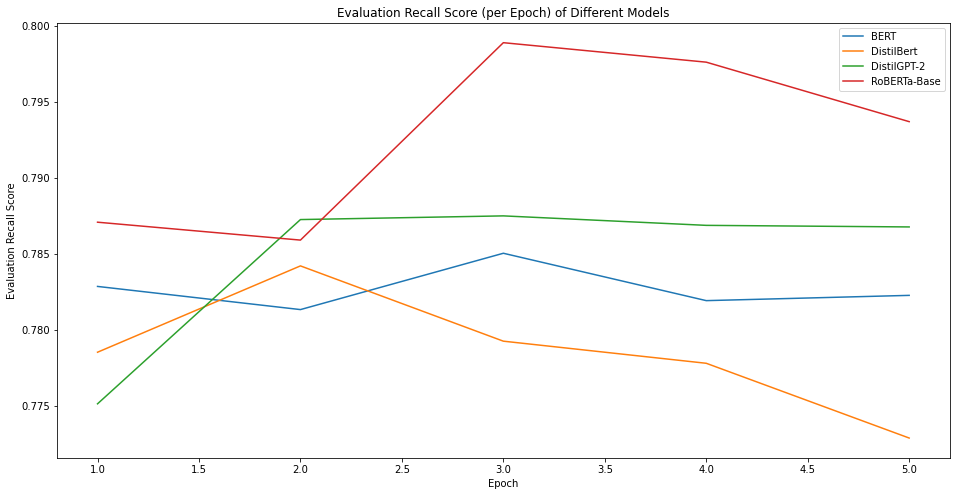

In [16]:
evalCurves("recall", score=True)

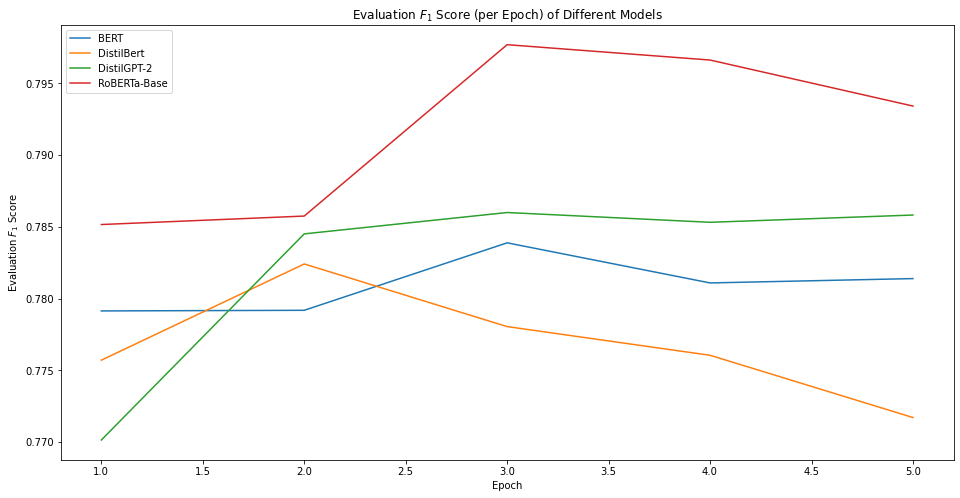

In [17]:
evalCurves("f1", "$F_1$", score=True)

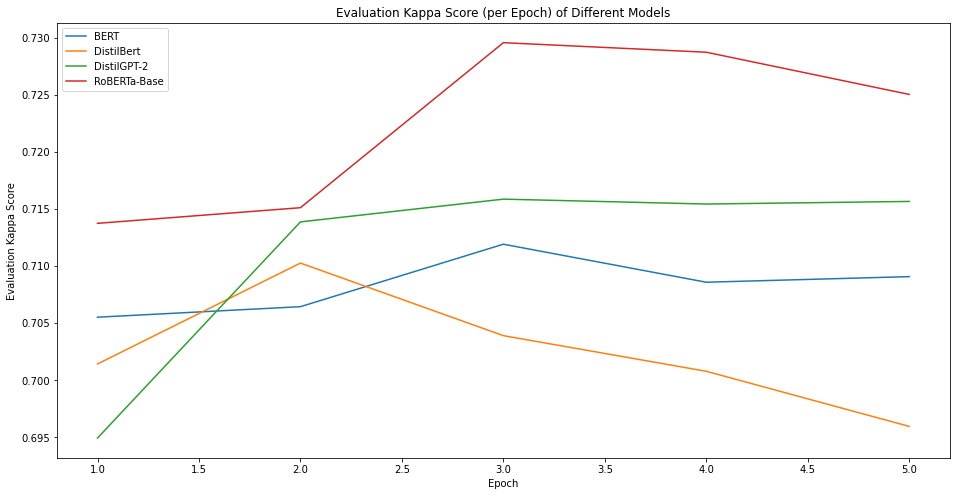

In [18]:
evalCurves("kappa", score=True)

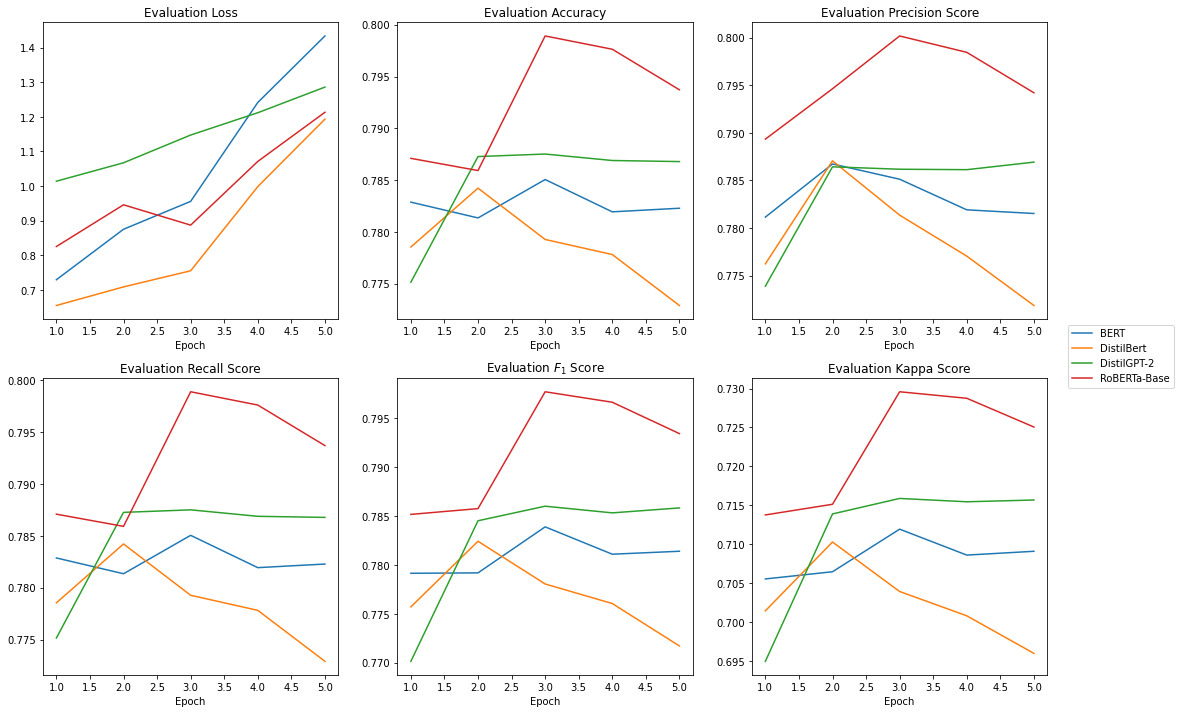

In [19]:
def evalCurves2(ax, col, label=None, score=False):
    if label is None: label = col.title()
    if score: label += " Score"
    #fig, ax = plt.subplots(figsize=(16, 8))
    bertEval.plot(y="eval_"+col, label=f"BERT", ax=ax)
    dbertEval.plot(y="eval_"+col, label=f"DistilBert", ax=ax)
    gptEval.plot(y="eval_"+col, label=f"DistilGPT-2", ax=ax)
    robertaEval.plot(y="eval_"+col, label=f"RoBERTa-Base", ax=ax)
    _ = ax.set(ylabel="", xlabel="Epoch", title="Evaluation "+label)

fig, axes = plt.subplots(2, 3,figsize=(18,12))
evalCurves2(axes[0,0], "loss")
evalCurves2(axes[0,1], "accuracy")
evalCurves2(axes[0,2], "precision", score=True)
evalCurves2(axes[1,0], "recall", score=True)
evalCurves2(axes[1,1], "f1", "$F_1$", score=True)
evalCurves2(axes[1,2], "kappa", score=True)

handles, labels = axes[1,2].get_legend_handles_labels()
for i in range(2):
    for j in range(3):
        axes[i, j].get_legend().remove()
        
fig.legend(handles, labels, loc='center right')
#fig.suptitle("Evaluation Metrics (per Epoch) of Different Models")

### Training Metrics

In [20]:
modelTrain = pd.DataFrame({"BERT":bertTrain, "DistilBERT":dbertTrain, "DistilGPT-2":gptTrain, "RoBERTa-Base":robertaTrain}).T
modelTrain

,train_runtime,train_samples_per_second,train_steps_per_second,total_flos,train_loss
BERT,22549.2786,22.397,5.599,1.294388e+17,0.515531
DistilBERT,10581.7755,47.726,5.966,6.663723e+16,0.469049
DistilGPT-2,8779.0192,57.526,28.763,9.657177e+15,0.837268
RoBERTa-Base,23161.3389,21.805,5.451,1.300263e+17,0.618564


<AxesSubplot:title={'center':'Training Loss of Each Model'}>

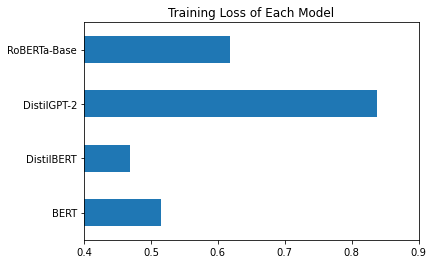

In [21]:
modelTrain.train_loss.plot.barh(xlim=(0.4, 0.9), title="Training Loss of Each Model")

<AxesSubplot:title={'center':'Training Runtime of Each Model'}>

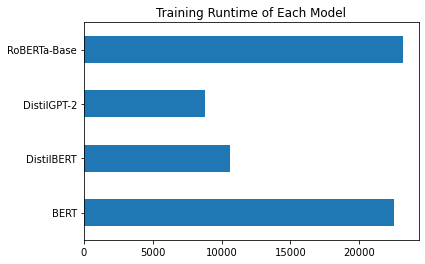

In [22]:
modelTrain.train_runtime.plot.barh(title="Training Runtime of Each Model")

### Evaluation Metric Summaries

In [23]:
def modelEval(func, name):
    df = pd.DataFrame({"BERT":func(bertEval, axis=0), "DistilBERT":func(dbertEval, axis=0), "DistilGPT-2":func(gptEval, axis=0), "RoBERTa-Base":func(robertaEval, axis=0)}).T
    fig, axes = plt.subplots(3, 2, figsize=(16,16))
    df.eval_loss.plot.barh(title=name+" Evaluation Loss for Each Model", ax=axes[0,0], xlim=(floor(df.eval_loss.min()*25)/25, ceil(df.eval_loss.max()*25)/25))
    df.eval_accuracy.plot.barh(title=name+" Evaluation Accuracy Score for Each Model", ax=axes[0,1], xlim=(floor(df.eval_accuracy.min()*25)/25, ceil(df.eval_accuracy.max()*25)/25))
    df.eval_precision.plot.barh(title=name+" Evaluation Precision Score for Each Model", ax=axes[1, 0], xlim=(floor(df.eval_precision.min()*25)/25, ceil(df.eval_precision.max()*25)/25))
    df.eval_recall.plot.barh(title=name+" Evaluation Recall Score for Each Model", ax=axes[1, 1], xlim=(floor(df.eval_recall.min()*25)/25, ceil(df.eval_recall.max()*25)/25))
    df.eval_f1.plot.barh(title=name+" Evaluation $F_1$ Score for Each Model", ax=axes[2,0], xlim=(floor(df.eval_f1.min()*25)/25, ceil(df.eval_f1.max()*25)/25))
    df.eval_kappa.plot.barh(title=name+" Evaluation Kappa Score for Each Model", ax=axes[2,1], xlim=(floor(df.eval_kappa.min()*25)/25, ceil(df.eval_kappa.max()*25)/25))
    plt.show()
    df.eval_runtime.plot.barh(title=name+" Evaluation Runtime for Each Model", figsize=(16, 8))


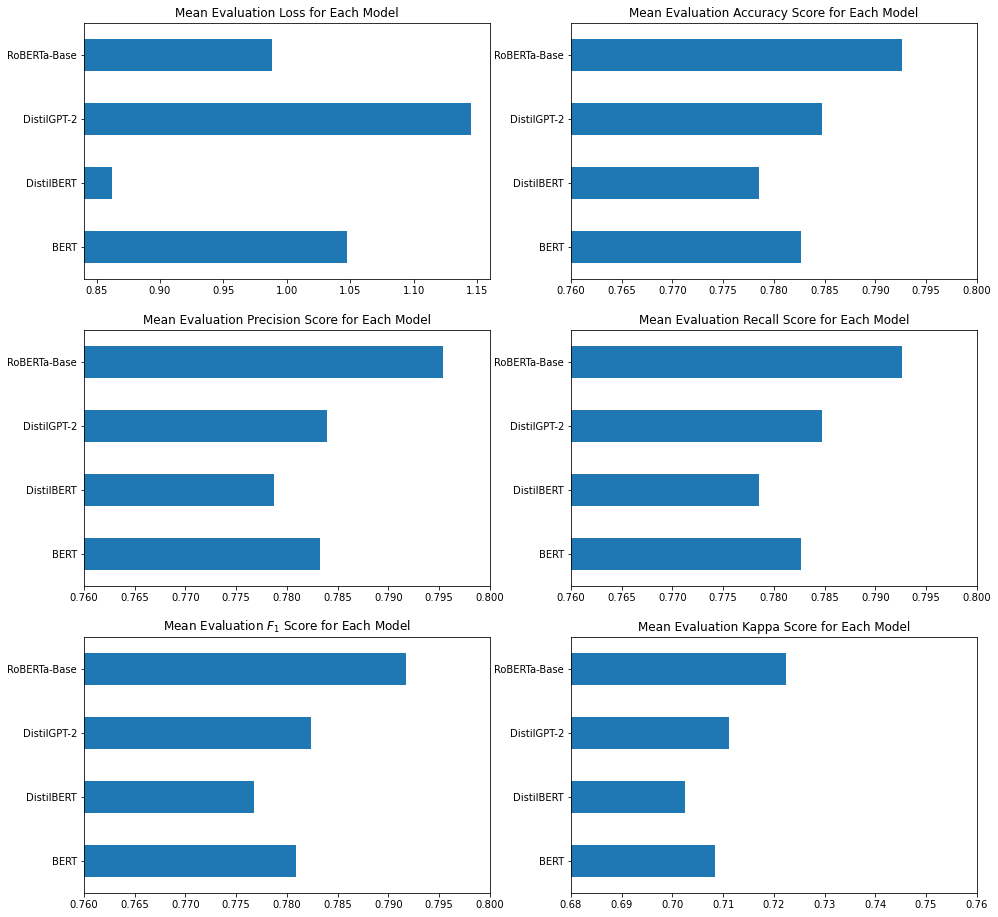

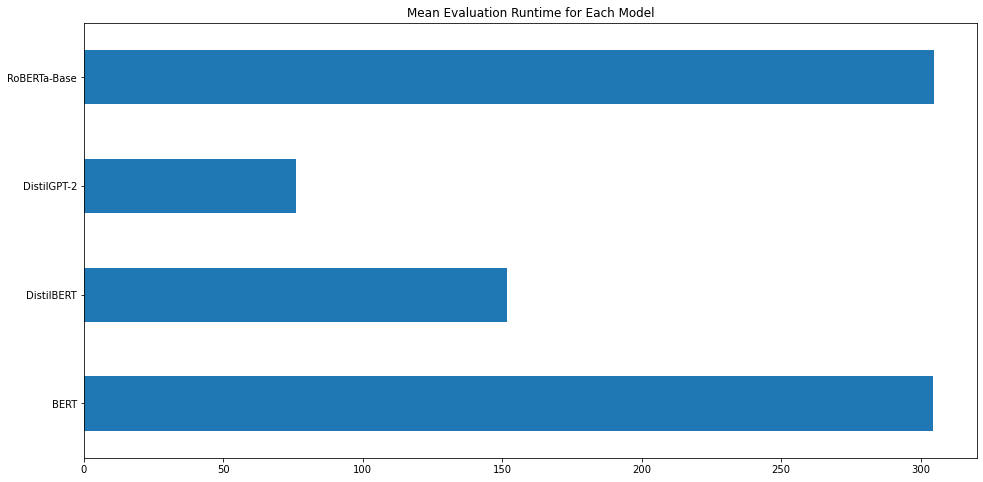

In [24]:
modelEval(np.mean, "Mean")

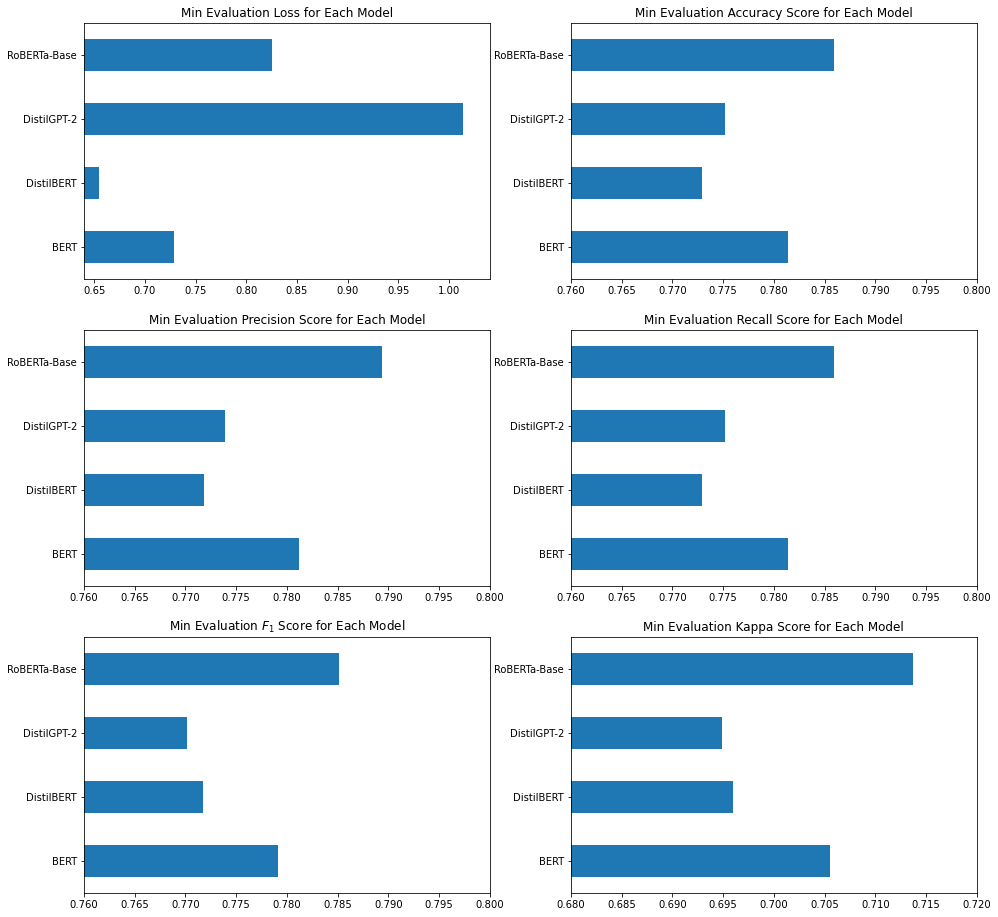

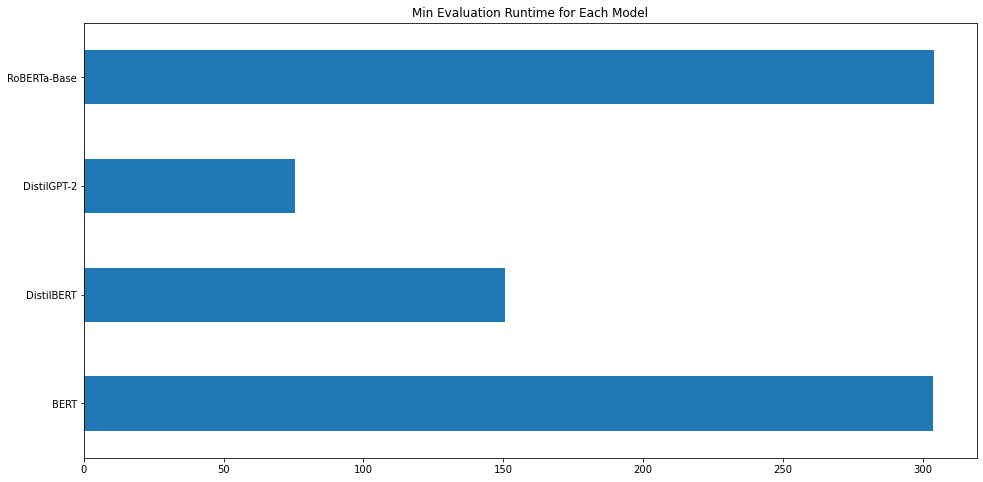

In [25]:
modelEval(np.min, "Min")

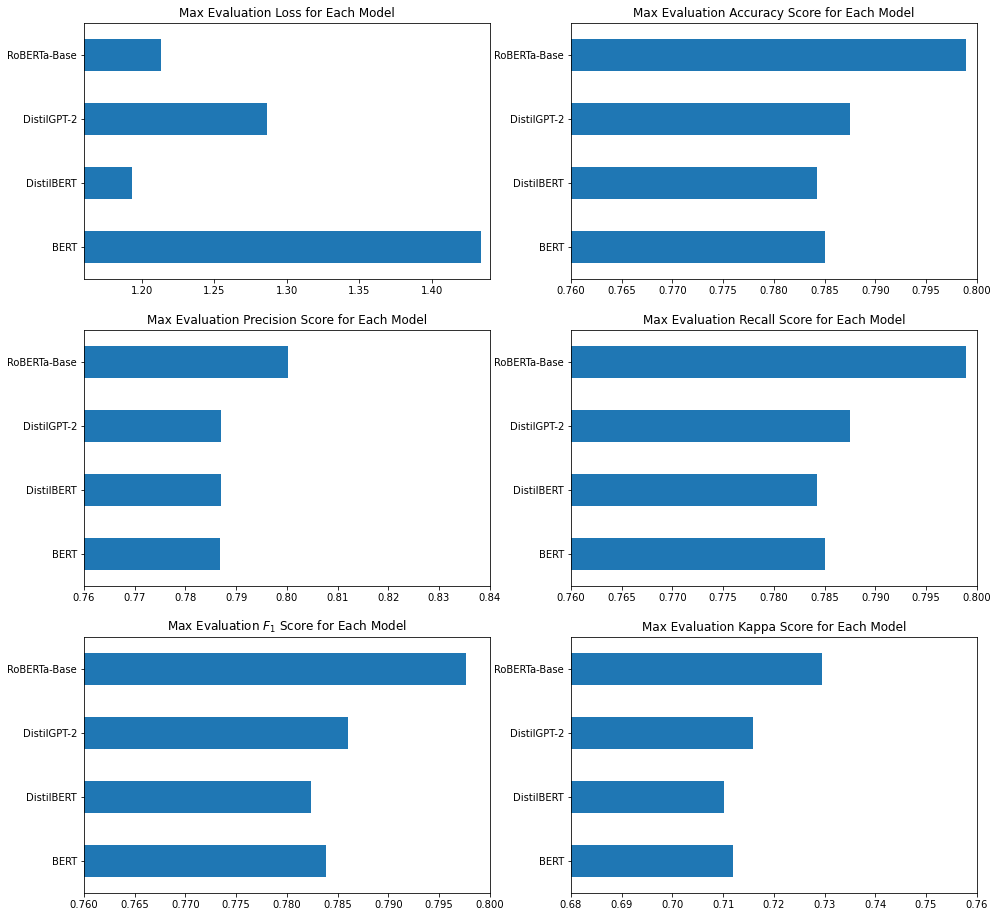

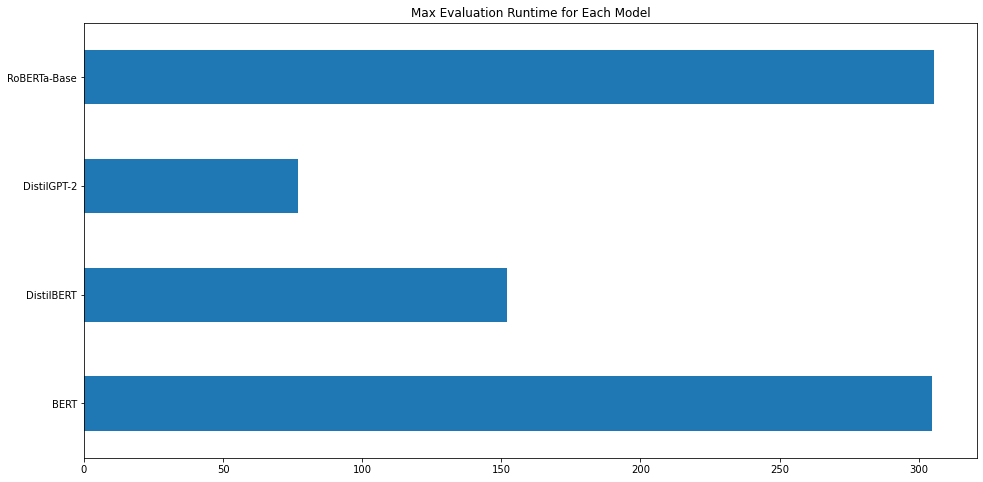

In [26]:
modelEval(np.max, "Max")

In [28]:
df = pd.DataFrame({"BERT":bertEval.loc[3], "DistilBERT":dbertEval.loc[2], "DistilGPT-2":gptEval.loc[5], "RoBERTa-Base":robertaEval.loc[3]}).T
df

,eval_loss,eval_accuracy,eval_precision,eval_recall,eval_f1,eval_kappa,eval_runtime,eval_samples_per_second,eval_steps_per_second
BERT,0.955705,0.785059,0.785133,0.785059,0.783889,0.711924,304.9153,94.692,23.675
DistilBERT,0.708428,0.784227,0.787063,0.784227,0.782416,0.710269,152.0087,189.943,23.749
DistilGPT-2,1.286081,0.786790,0.786927,0.786790,0.785826,0.715671,77.0835,374.568,187.290
RoBERTa-Base,0.886995,0.798912,0.800173,0.798912,0.797695,0.729586,304.1953,94.916,23.731


In [29]:
columns = ['eval_loss', 'eval_accuracy', 'eval_precision', 'eval_recall', 'eval_f1', 'eval_kappa']
newLabels = ["$\mathcal{L}_{eval}$", "Accuracy", "Precision", "Recall", "$F_1$", "$\kappa$"]
evalMetrics = df[columns].rename(columns=dict(zip(columns, newLabels))).round(3)
evalMetrics

,$\mathcal{L}_{eval}$,Accuracy,Precision,Recall,$F_1$,$\kappa$
BERT,0.956,0.785,0.785,0.785,0.784,0.712
DistilBERT,0.708,0.784,0.787,0.784,0.782,0.710
DistilGPT-2,1.286,0.787,0.787,0.787,0.786,0.716
RoBERTa-Base,0.887,0.799,0.800,0.799,0.798,0.730


In [30]:
trainLoss = modelTrain[["train_loss"]].rename(columns={"train_loss":"$\mathcal{L}_{train}$"}).round(3)
trainLoss

,$\mathcal{L}_{train}$
BERT,0.516
DistilBERT,0.469
DistilGPT-2,0.837
RoBERTa-Base,0.619


In [35]:
epoch = pd.DataFrame({"Epoch":{"BERT":3, "DistilBERT":2, "DistilGPT-2":5, "RoBERTa-Base":3}})
epoch

,Epoch
BERT,3
DistilBERT,2
DistilGPT-2,5
RoBERTa-Base,3


In [37]:
pd.concat([epoch, trainLoss, evalMetrics], axis=1)

,Epoch,$\mathcal{L}_{train}$,$\mathcal{L}_{eval}$,Accuracy,Precision,Recall,$F_1$,$\kappa$
BERT,3,0.516,0.956,0.785,0.785,0.785,0.784,0.712
DistilBERT,2,0.469,0.708,0.784,0.787,0.784,0.782,0.710
DistilGPT-2,5,0.837,1.286,0.787,0.787,0.787,0.786,0.716
RoBERTa-Base,3,0.619,0.887,0.799,0.800,0.799,0.798,0.730


In [38]:
print(pd.concat([epoch, trainLoss, evalMetrics], axis=1).to_latex())

\begin{tabular}{lrrrrrrrr}
\toprule
{} &  Epoch &  \$\textbackslash mathcal\{L\}\_\{train\}\$ &  \$\textbackslash mathcal\{L\}\_\{eval\}\$ &  Accuracy &  Precision &  Recall &  \$F\_1\$ &  \$\textbackslash kappa\$ \\
\midrule
BERT         &      3 &                  0.516 &                 0.956 &     0.785 &      0.785 &   0.785 &  0.784 &     0.712 \\
DistilBERT   &      2 &                  0.469 &                 0.708 &     0.784 &      0.787 &   0.784 &  0.782 &     0.710 \\
DistilGPT-2  &      5 &                  0.837 &                 1.286 &     0.787 &      0.787 &   0.787 &  0.786 &     0.716 \\
RoBERTa-Base &      3 &                  0.619 &                 0.887 &     0.799 &      0.800 &   0.799 &  0.798 &     0.730 \\
\bottomrule
\end{tabular}



## Conclusion

Based on all observed metrics above, we conclude that `RoBERTa-Base` is the best model to continue as our Teacher Model for the rest of the project. Thank you.